   ### Dow Jones Index

Source: https://archive.ics.uci.edu/ml/datasets/dow+jones+index

Esse dataset foi retirado do repositório de Machine Learning do UCI com intuído de realizar a exploração dos dados, construir visualizações para entender mais sobre os dados e no fim construir um modelo de Classificação que traga uma boa taxa de acurácia.

A idéia é prever a porcentagem de mudança dos preços para a próxima semana usando modelos de classificação 

In [1]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
arquivo = 'data/Dow_Jones_Stocks.csv'
stock_analysis = read_csv(arquivo, encoding ='utf-8') # , index_col = 'date'
print(stock_analysis.shape)

(750, 16)


In [3]:
stock_analysis.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,07-01-11,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,14-01-11,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,21-01-11,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,28-01-11,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,04-02-11,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


In [4]:
stock_analysis.isna().sum()

quarter                                0
stock                                  0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64

In [5]:
# Removendo as colunas que não utilizarei para o modelo 
stock_analysis.drop(['date', 'open', 'close', 'high', 'low', 'volume', 'previous_weeks_volume', 
                    'next_weeks_open', 'next_weeks_close', 'percent_return_next_dividend'], axis = 1, inplace = True)

In [6]:
# Removendo os dados NaN
df = stock_analysis.dropna(subset=['percent_change_volume_over_last_wk'])

In [7]:
# Verificando os tipos de dados 
df.dtypes

quarter                                 int64
stock                                  object
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
percent_change_next_weeks_price       float64
days_to_next_dividend                   int64
dtype: object

In [8]:
# Verificando a correlação dos dados utilizando o métod Pearson
df.corr(method = 'pearson')

,quarter,percent_change_price,percent_change_volume_over_last_wk,percent_change_next_weeks_price,days_to_next_dividend
quarter,1.000000,-0.076259,0.023662,0.000098,-0.020749
percent_change_price,-0.076259,1.000000,-0.234496,0.020639,-0.009060
percent_change_volume_over_last_wk,0.023662,-0.234496,1.000000,0.013181,-0.033348
percent_change_next_weeks_price,0.000098,0.020639,0.013181,1.000000,-0.028797
days_to_next_dividend,-0.020749,-0.009060,-0.033348,-0.028797,1.000000


In [9]:
# Verificando a assimetria dos dados
df.skew()

quarter                              -0.167598
percent_change_price                 -0.414007
percent_change_volume_over_last_wk    2.544001
percent_change_next_weeks_price      -0.137200
days_to_next_dividend                 2.967252
dtype: float64

In [10]:
# Verificando as medidas dos dados
df.describe()

,quarter,percent_change_price,percent_change_volume_over_last_wk,percent_change_next_weeks_price,days_to_next_dividend
count,720.000000,720.000000,720.000000,720.000000,720.000000
mean,1.541667,0.030140,5.593627,0.193309,52.259722
std,0.498607,2.504889,40.543478,2.663880,45.881968
min,1.000000,-15.422900,-61.433175,-15.422900,0.000000
25%,1.000000,-1.297355,-19.804284,-1.252413,24.000000
50%,2.000000,0.000000,0.512586,0.035998,47.000000
75%,2.000000,1.630870,21.800622,1.792650,69.250000
max,2.000000,9.882230,327.408924,9.882230,329.000000


<AxesSubplot:xlabel='percent_change_next_weeks_price', ylabel='Density'>

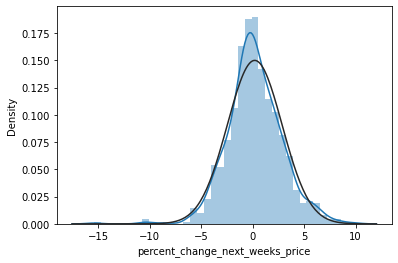

In [11]:
# Verificando se os dados estao normalizados
from scipy import stats
sns.distplot(df.percent_change_next_weeks_price, fit = stats.norm)

In [12]:
# Transformando os dados para a mesma escala

from sklearn.preprocessing import MinMaxScaler

array = df.values

# Separando o array em componentes de input (X) e output (Y)
X = array[:,2:3]
Y = array[:,4]

# Normalizando os dados
scaler = MinMaxScaler(feature_range = (0,1))
rescaledX = scaler.fit_transform(X)

print("\nDados Normalizados: \n\n", rescaledX[0:5,:])


Dados Normalizados: 

 [[0.43447356]
 [0.51184246]
 [0.67421942]
 [0.84394548]
 [0.61859844]]


In [13]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

#array = df.values

#X = array[:, 2:3]
#Y = array[:,4]

# Transformando y como tipo int
Y = Y.astype('int')

# Definindo os valores para o número de folds
num_folds = 10
seed = 0

# Separando os dados em folds
kfolds = KFold(num_folds, shuffle = True, random_state = seed)

# Criando o modelo
model = LogisticRegression()
model.fit(rescaledX, Y)

# Cross validation
resultado = cross_val_score(model, rescaledX, Y, cv = kfolds)

# Print do resultado
print("A Acurácia do modelo é: %.3f%%" % (resultado.mean() * 100))

A Acurácia do modelo é: 36.806%
